# TELECOMMUNICATION CUSTOMER CHURN ANALYSIS

The Analysis goal is to find out the factor that affecting the churn of customers.

The Dataset include information about:

1. Customer who left within the lat month - this column is called churn.
2. Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device        protection, tech support, and streaming TV and movies. 
3. Customer account information: how long they have been a customer, contact, payment method, paperless billing, monthly          charges, and total charges.
4. Demographic info of customers: Gender, age, range, and if they have parteners and dependents.


In [1]:
# import the necessory libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# to read the dataset
df = pd.read_csv(r"C:\Users\datta\Downloads\Churn.csv")

In [3]:
# To understand data more clearly removing column limit
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
6     1452-KIOVK    Male              0      No        Yes      22   
7     6713-OKOMC  Female              0      No         No      10   
8     7892-POOKP  Female              0     Yes         No      28   
9     6388-TABGU    Male              0      No        Yes      62   
10    9763-GRSKD    Male              0     Yes        Yes      13   
11    7469-LKBCI    Male              0      No         No      16   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    Male              0      No         No      49   
14    5129-JLPIS    Male              0      No         No      25   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
16    8191-XWSZG  Female              0      No         No      52   
17    9959-WOFKT    Male              0      No        Yes      71   
18    4190-MFLUW  Female              0     Yes        Yes      10   
19    4183-MYFRB  Female              0      No         No      21   
20    8779-QRDMV    Male              1      No         No       1   
21    1680-VDCWW    Male              0     Yes         No      12   
22    1066-JKSGK    Male              0      No         No       1   
23    3638-WEABW  Female              0     Yes         No      58   
24    6322-HRPFA    Male              0     Yes        Yes      49   
25    6865-JZNKO  Female              0      No         No      30   
26    6467-CHFZW    Male              0     Yes        Yes      47   
27    8665-UTDHZ    Male              0     Yes        Yes       1   
28    5248-YGIJN    Male              0     Yes         No      72   
29    8773-HHUOZ  Female              0      No        Yes      17   
30    3841-NFECX  Female              1     Yes         No      71   
31    4929-XIHVW    Male              1     Yes         No       2   
32    6827-IEAUQ  Female              0     Yes        Yes      27   
33    7310-EGVHZ    Male              0      No         No       1   
34    3413-BMNZE    Male              1      No         No       1   
35    6234-RAAPL  Female              0     Yes        Yes      72   
36    6047-YHPVI    Male              0      No         No       5   
37    6572-ADKRS  Female              0      No         No      46   
38    5380-WJKOV    Male              0      No         No      34   
39    8168-UQWWF  Female              0      No         No      11   
40    8865-TNMNX    Male              0     Yes        Yes      10   
41    9489-DEDVP  Female              0     Yes        Yes      70   
42    9867-JCZSP  Female              0     Yes        Yes      17   
43    4671-VJLCL  Female              0      No         No      63   
44    4080-IIARD  Female              0     Yes         No      13   
45    3714-NTNFO  Female              0      No         No      49   
46    5948-UJZLF    Male              0      No         No       2   
47    7760-OYPDY  Female              0      No         No       2   
48    7639-LIAYI    Male              0      No         No      52   
49    2954-PIBKO  Female              0     Yes        Yes      69   
50    8012-SOUDQ  Female              1      No         No      43   
51    9420-LOJKX  Female              0      No         No      15   
52    6575-SUVOI  Female              1     Yes         No      25   
53    7495-OOKFY  Female              1     Yes         No       8   
54    4667-QONEA  Female              1     Yes        Yes      60   
55    1658-BYGOY    Male              1      No         No      18   
56    8769-KKTPH

In [5]:
# displaying  first 5 rows of dataset 
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [6]:
# displaying  last 5 rows of dataset
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No

In [7]:
# to check the no. of columns and rows of dataset
df.shape

(7043, 21)

In [8]:
# to get information about dataset like null values, datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.TotalCharges.value_counts()

TotalCharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
19.65       8
45.3        7
19.55       7
20.15       6
20.25       6
19.45       6
20.3        5
20.45       5
19.85       4
69.9        4
20.4        4
70.6        4
19.2        4
69.65       4
44          4
44.4        4
20.5        4
49.9        4
74.7        4
19.3        4
19.95       4
19.5        4
75.3        4
50.15       4
20.35       4
69.6        4
19.4        4
69.95       4
19.25       3
70.45       3
1284.2      3
69.25       3
74.3        3
20.9        3
220.45      3
20.55       3
69.1        3
20.1        3
305.55      3
50.6        3
74.6        3
20          3
45.85       3
44.75       3
70.15       3
75.35       3
19.1        3
74.9        3
86.05       3
79.55       3
74.35       3
35.9        3
24.4        3
45.7        3
2317.1      3
383.65      3
50.75       3
25.25       3
55.7        3
45.1        3
84.5        3
85          3
50.45       3
80.55       3
70.3        3
24.8   

# Data Cleaning


In [11]:
# checking null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# To fetch the unique values and their counts from TotalCharges
df['TotalCharges'].value_counts()

TotalCharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
19.65       8
45.3        7
19.55       7
20.15       6
20.25       6
19.45       6
20.3        5
20.45       5
19.85       4
69.9        4
20.4        4
70.6        4
19.2        4
69.65       4
44          4
44.4        4
20.5        4
49.9        4
74.7        4
19.3        4
19.95       4
19.5        4
75.3        4
50.15       4
20.35       4
69.6        4
19.4        4
69.95       4
19.25       3
70.45       3
1284.2      3
69.25       3
74.3        3
20.9        3
220.45      3
20.55       3
69.1        3
20.1        3
305.55      3
50.6        3
74.6        3
20          3
45.85       3
44.75       3
70.15       3
75.35       3
19.1        3
74.9        3
86.05       3
79.55       3
74.35       3
35.9        3
24.4        3
45.7        3
2317.1      3
383.65      3
50.75       3
25.25       3
55.7        3
45.1        3
84.5        3
85          3
50.45       3
80.55       3
70.3        3
24.8   

In [13]:
df.index[df['TotalCharges']==" "].tolist()

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [14]:
df.iloc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85             

In [15]:
# replacing the ' ' with 0 as tenure is 0 in TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)

In [16]:
# converting datatype of TotalCharges to float
df['TotalCharges']= df['TotalCharges'].astype('float')

In [17]:
# Gives the statistical summary of the data
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [43]:
# converting datatype of TotalCharges to float
df['TotalCharges']= df['TotalCharges'].astype('float')

In [19]:
# Replacing SeniorCitizen values 0 and 1 into no and yes
def change(value):
    if value ==1:
        return "yes"
    else:
        return "no"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(change)

In [20]:
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

# EDA

### 1. Based On Demographic information of customers 

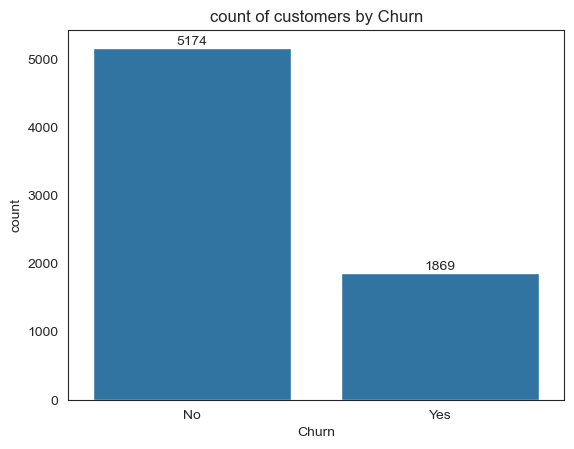

In [21]:
# Count of customer by churn
sns.set_style("white")
churn_count = sns.countplot(x = "Churn", data=df,)
churn_count.set_title('count of customers by Churn')
churn_count.bar_label(container = churn_count.containers[0])
plt.show()

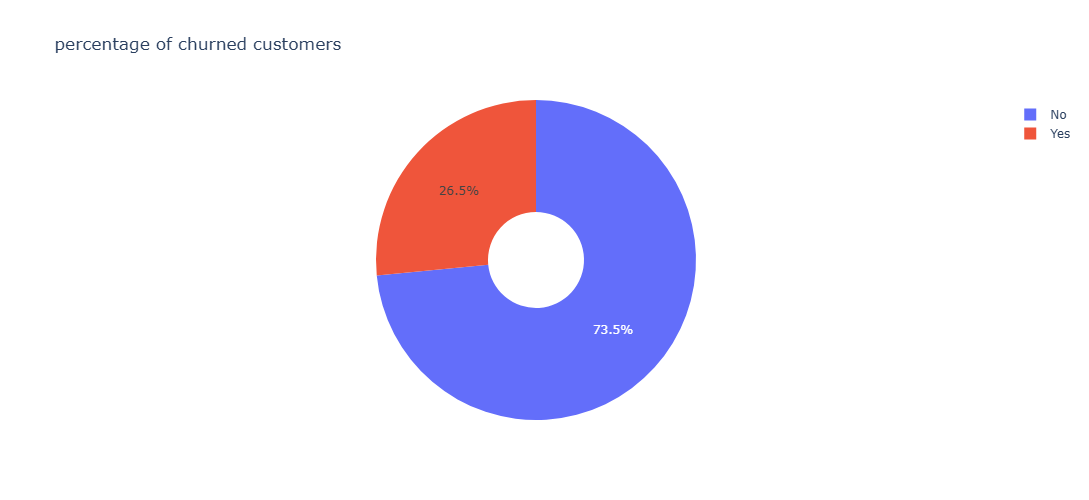

In [22]:
# percetage of churned and not churned customers.
churn_percent = df.groupby("Churn").agg({"Churn":"count"})
fig = px.pie(churn_percent, values='Churn', names = churn_percent.index,
            title = 'percentage of churned customers',
            hole = 0.3,
            width = 600,
            height = 500,
            )
fig.show()

Text(0.5, 1.0, 'Distribution Of Senior Citizens')

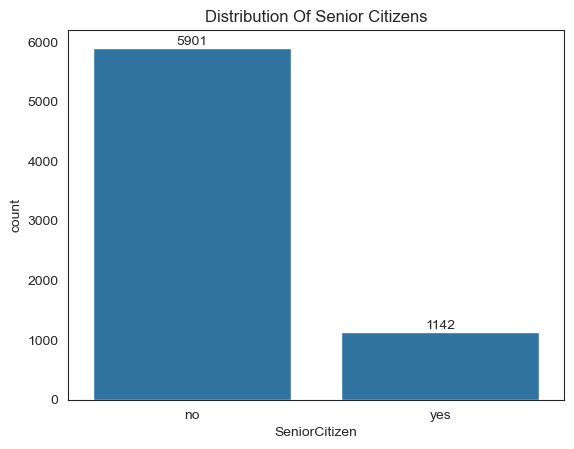

In [23]:
# Distribution of senior citizens
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(container = ax.containers[0])
ax.set_title('Distribution Of Senior Citizens')

                                       


Text(0.5, 1.0, 'Churn based on Senior Cititzens')

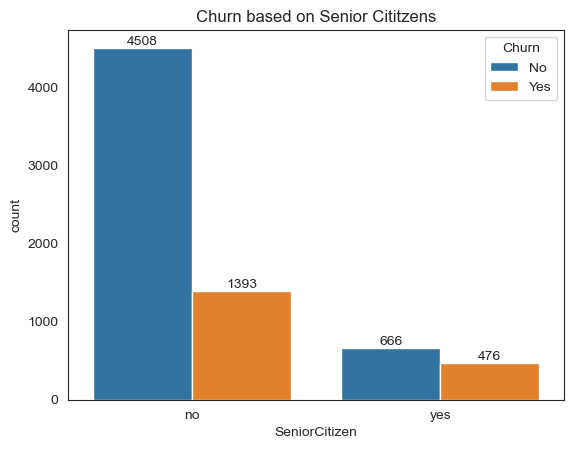

In [24]:
# Churn count based on the senior citizens.
ax=sns.countplot(x= 'SeniorCitizen', hue = 'Churn', data = df)
ax.bar_label(container = ax.containers[0])
ax.bar_label(container = ax.containers[1])
ax.set_title('Churn based on Senior Cititzens')

Text(0, 0.5, 'Percentage(%)')

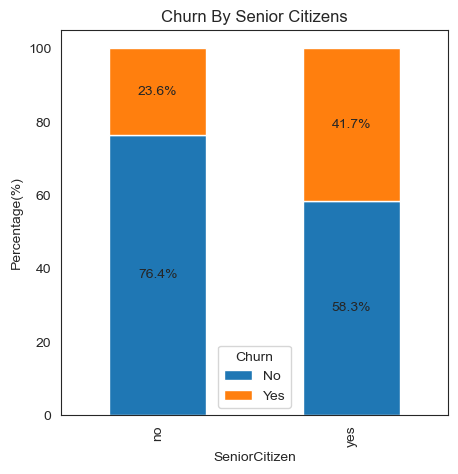

In [25]:
# Stacked Chart of churn based on Senior Citizens
total_count= df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack()*100
fig, ax = plt.subplots(figsize = (5,5))
total_count.plot(kind = 'bar', stacked = True, ax = ax, color = ['#1f77b4','#ff7f0e'])
for p in ax.patches:
    width, height= p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.text(x+ width /2, y+height/2, f'{height:.1f}%', ha = 'center', va = 'center')
            
plt.title('Churn By Senior Citizens')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage(%)')

Text(0.5, 1.0, 'Churn Based on Partner')

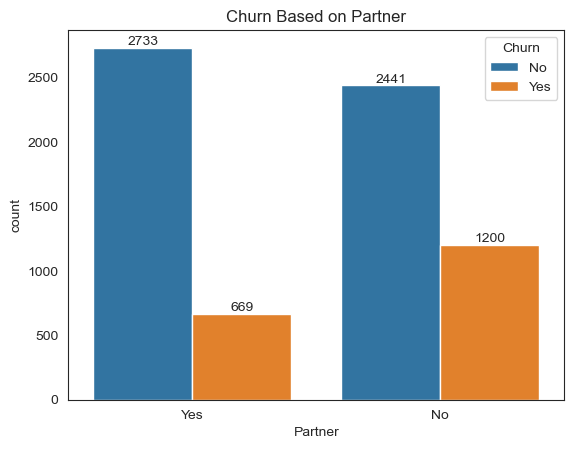

In [27]:
# Churn Based On Partners
ax = sns.countplot( x = 'Partner', hue = 'Churn', data = df)
ax.bar_label(container = ax.containers[0])
ax.bar_label(container = ax.containers[1])
ax.set_title('Churn Based on Partner')

Text(0.5, 1.0, 'Churn Based on Dependents')

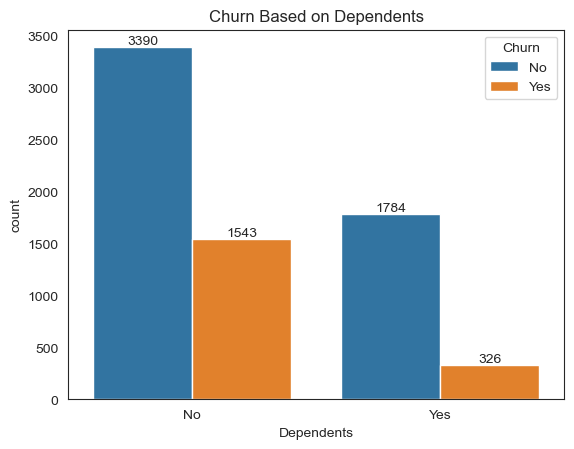

In [28]:
# Churn Based on Dependents
ax = sns.countplot(x = 'Dependents', hue = 'Churn', data = df)
ax.bar_label(container = ax.containers[0])
ax.bar_label(container = ax.containers[1])
ax.set_title('Churn Based on Dependents')

In [29]:
# Analysis 1: from the customers most of the Senior Citizens have churned.
# The customers who does not have a partner or any dependents tends to churn at a Higher Rate.

# Based on Service

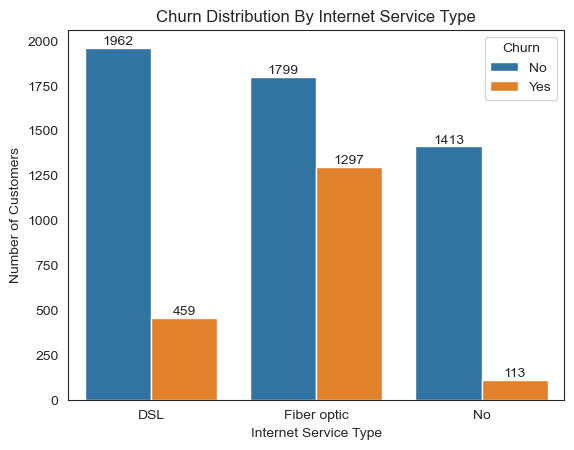

In [31]:
# churn distribution based on Internet Service type 

ax = sns.countplot(x = 'InternetService', hue = 'Churn', data = df)
ax.bar_label(container = ax.containers[0])
ax.bar_label(container = ax.containers[1])

plt.title('Churn Distribution By Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')

In [ ]:
# Analysis 2:  WE can see from above plot that the fiber optic internet service type is making our customers to churn more

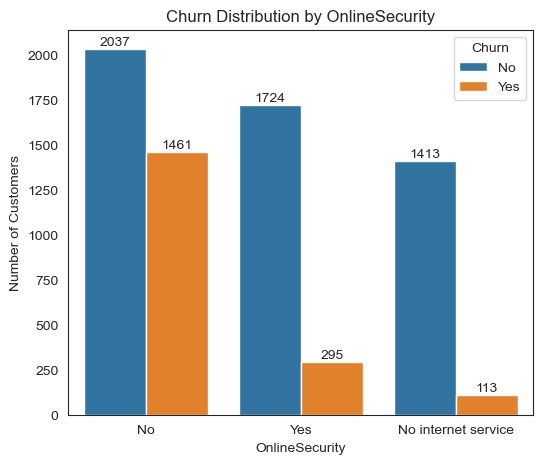

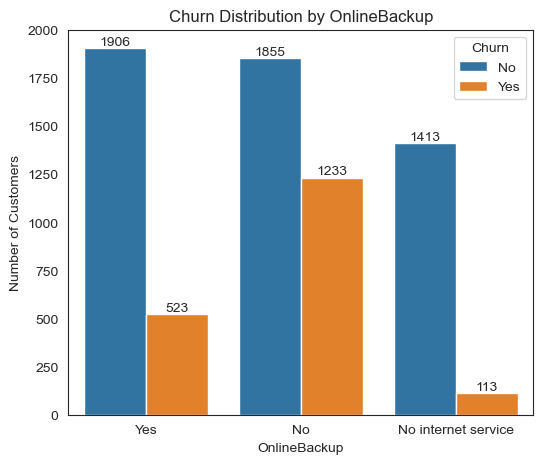

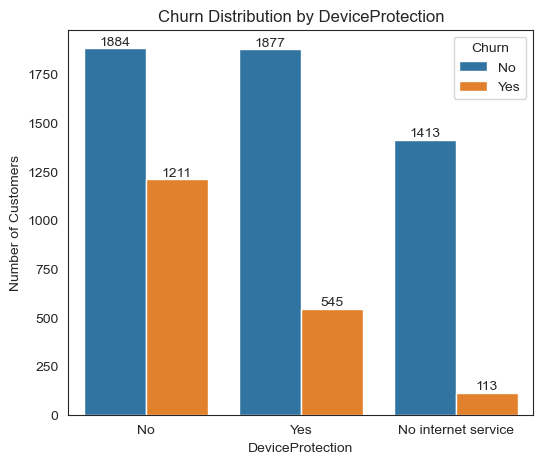

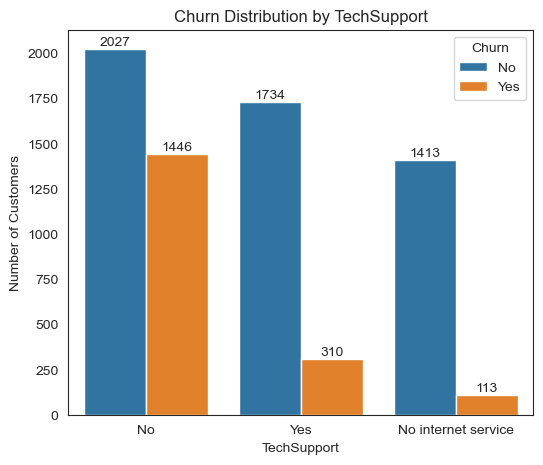

In [32]:
service_name = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for service in service_name:
    plt.figure(figsize = (6,5))
    ax = sns.countplot(data = df, x = service, hue = 'Churn')
    ax.bar_label(container = ax.containers[0])
    ax.bar_label(container = ax.containers[1])
    
    plt.title(f'Churn Distribution by {service}')
    plt.xlabel(service)
    plt.ylabel('Number of Customers')
    plt.legend(title = 'Churn')

In [33]:
# from the above chart we can see that customers  having no additional services will tends to churn.

#  Based On Customers Account Information

Text(0.5, 1.0, 'Contract vs Churn')

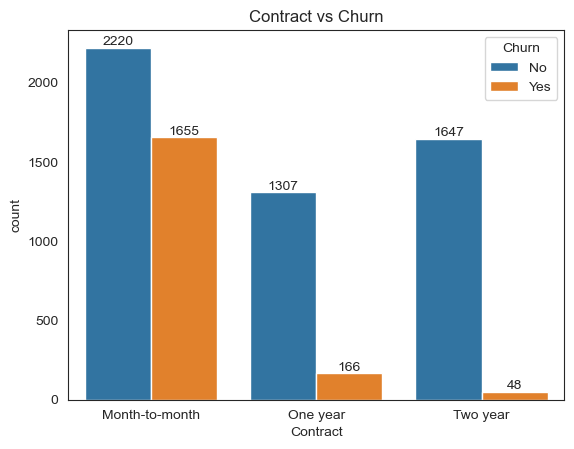

In [34]:
# contracts vs churn
ax = sns.countplot(x = 'Contract', hue = 'Churn', data = df)
ax.bar_label(container = ax.containers[0])
ax.bar_label(container = ax.containers[1])
ax.set_title('Contract vs Churn')

In [35]:
# Analysis 4 : Customers who have month to month contranct are likely to churn  than from those who have 1 or 2 years of contract.

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

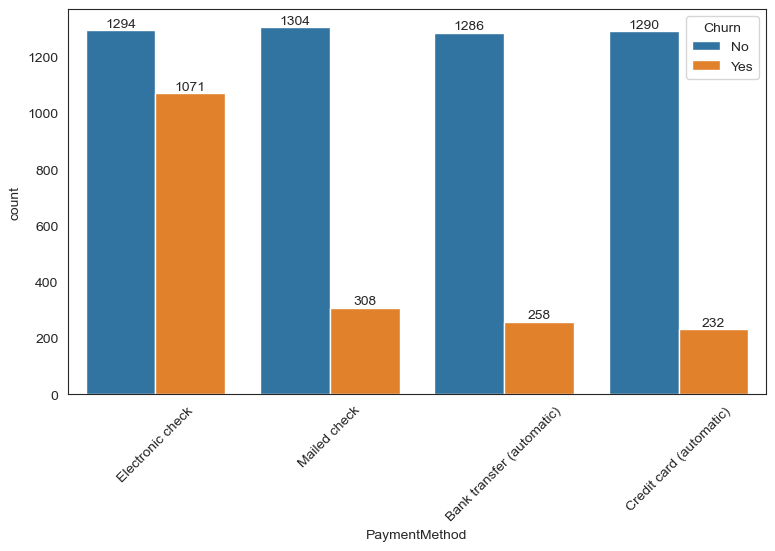

In [36]:
# Churn vs Payment Method
plt.figure(figsize = (9,5))
ax = sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = df)
ax.bar_label(container = ax.containers[0])
ax.bar_label(container = ax.containers[1])
plt.xticks(rotation = 45)

In [38]:
# Analysis 5: The Electronic check payment method customers are churning more than any other payment Method.


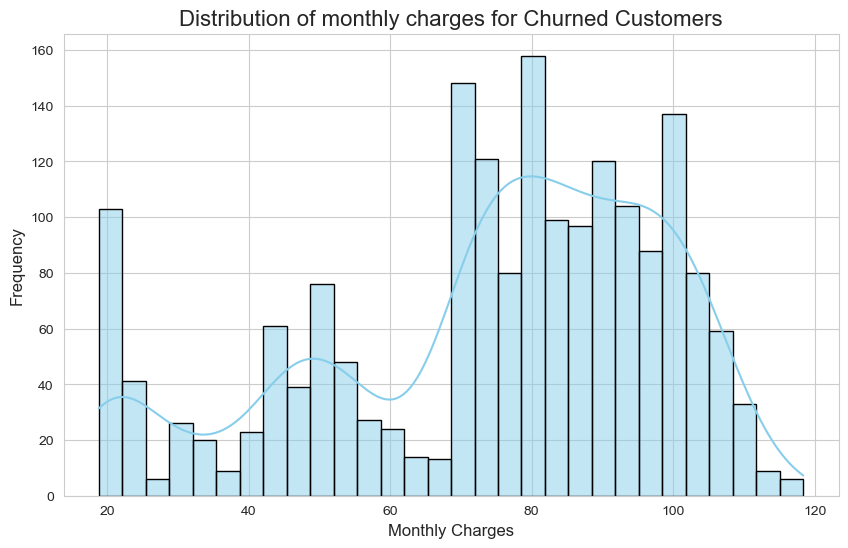

In [37]:
# Monthly charges Distribution
churned_customers = df[df['Churn'] == 'Yes']
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.histplot(churned_customers['MonthlyCharges'], bins = 30, kde = True, color= 'skyblue', edgecolor = 'black')
plt.title('Distribution of monthly charges for Churned Customers', fontsize = 16)
plt.xlabel('Monthly Charges', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [39]:
# Analysis 6 : Due to highetr monthly charges there is an increse in the churn of customers.


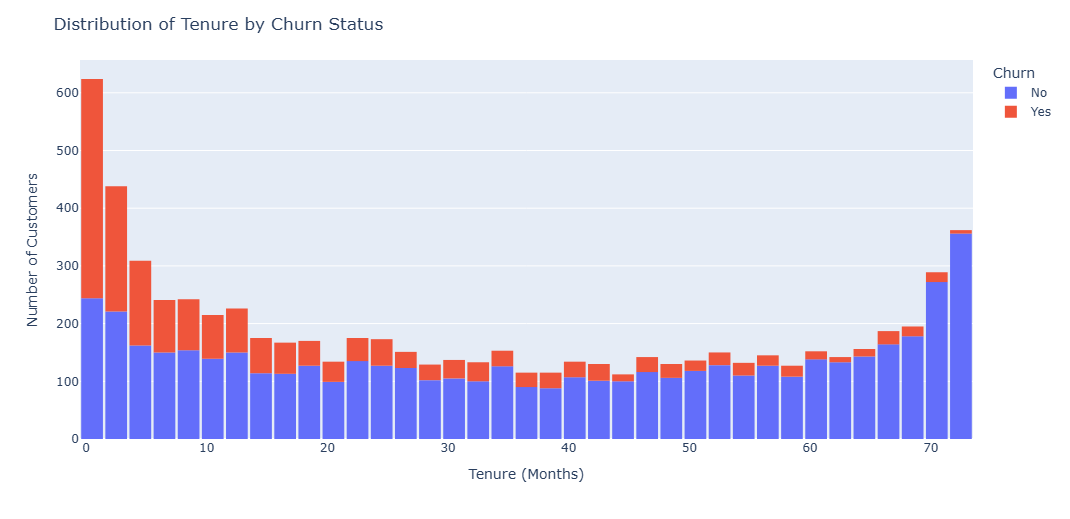

In [40]:
# Histogram based on the Churn vs Tenure.
fig = px.histogram(df, x = 'tenure',color= 'Churn',
                  hover_data = df.columns, width = 1100,
                  height = 500)
fig.update_layout(
title_text = 'Distribution of Tenure by Churn Status',
xaxis_title_text = 'Tenure (Months)',
yaxis_title_text = 'Number of Customers',
bargroupgap = 0.1
)
fig.show()

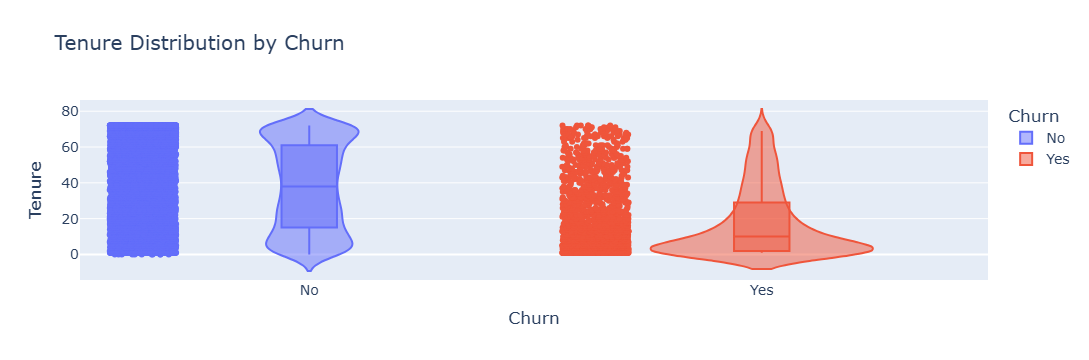

In [41]:
# violin plot based on churn vs tenure.
fig = px.violin(df, x= "Churn", y = "tenure", color = "Churn",
               box = True, points = "all",
               title = "Tenure Distribution by Churn")
fig.update_layout(
 xaxis_title= "Churn",
 yaxis_title = 'Tenure',
 font = dict(size = 14),
 )
fig.show()

In [42]:
# Analysis 7 : from the vivolin chart we can see that there is a correletion between tenure and churn.
# we can see that the customers who have longer tenure tends to stay with compony as compared to the customers with small tenure.

# Conclusion